In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from tqdm import tqdm
from nba_api.stats.static import players, teams
from nba_api.stats.library.parameters import SeasonAll

In C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Jordan Nishimura\Anaconda3\lib\site-

In [2]:
pd.options.display.max_columns=200

## Compiling and Cleaning Data

In [52]:
team_gamelog = pd.read_csv('./data/gamelog_2018-19.csv')
player_gamelog = pd.read_csv('./data/player_gamelogs_2010-11.csv')

In [53]:
team_gamelog.head()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK
0,2018-19,1610612751,BKN,Brooklyn Nets,21801221,2019-04-10T00:00:00,BKN vs. MIA,W,48.0,43,114,0.377,21,58,0.362,6,7,0.857,20,48,68,29,12.0,7,3,4,13,12,113,19.0,1,1,1,1,135,760,12,2330,23,8,1130,2408,2440,451,23,20,3,410,636,1203,1731,731,40,2422,1031,226
1,2018-19,1610612766,CHA,Charlotte Hornets,21801222,2019-04-10T00:00:00,CHA vs. ORL,L,48.0,41,78,0.526,8,29,0.276,24,27,0.889,4,28,32,21,8.0,3,4,2,14,19,114,-8.0,1,1231,1231,1231,135,1130,2303,300,1907,1510,2022,331,661,257,2360,2150,2400,1752,96,2301,1329,146,80,1522,959,1711
2,2018-19,1610612744,GSW,Golden State Warriors,21801225,2019-04-10T00:00:00,GSW @ MEM,L,48.0,46,92,0.500,13,30,0.433,12,14,0.857,9,30,39,32,14.0,3,5,0,17,18,117,-15.0,1,1231,1231,1231,135,360,755,535,646,1381,427,1967,2157,451,1362,1905,1966,175,1135,2301,917,1,376,1725,733,2080
3,2018-19,1610612743,DEN,Denver Nuggets,21801228,2019-04-10T00:00:00,DEN vs. MIN,W,48.0,39,87,0.448,10,33,0.303,11,17,0.647,12,41,53,23,13.0,6,4,0,12,22,99,4.0,1,1,1,1,135,1496,1438,1448,1372,972,1785,2083,1894,2154,649,288,267,1394,890,1543,1329,1,23,823,2012,977
4,2018-19,1610612755,PHI,Philadelphia 76ers,21801224,2019-04-10T00:00:00,PHI vs. CHI,W,48.0,52,93,0.559,12,26,0.462,9,15,0.600,9,38,47,30,7.0,4,10,3,11,13,125,16.0,1,1,1,1,135,53,626,94,864,1883,267,2271,2083,2311,1362,610,893,308,35,2133,53,393,11,2382,315,303


In [82]:
def clean_team_gamelog(team_gamelog = team_gamelog):
    df = team_gamelog.copy()
    df = team_gamelog[['SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS']]
    
    # Convert GAME_DATE to datetime so it is sortable
    df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
    
    # Sort by team and date
    df.sort_values(['TEAM_ABBREVIATION', 'GAME_DATE'], inplace=True)
    
    # Combine rows so that one instance shows a game with team stats and opponent stats
    full_gamelogs = pd.merge(df, df, how='inner', on='GAME_ID', suffixes=['', '_opp'])

    # Remove rows that were created where the team is playing itself
    full_gamelogs = full_gamelogs.loc[full_gamelogs['TEAM_ABBREVIATION'] != full_gamelogs['TEAM_ABBREVIATION_opp']]

    # Add column for HOME_GAME
    full_gamelogs['HOME_GAME'] = (full_gamelogs['MATCHUP'].str[:6] == (full_gamelogs['TEAM_ABBREVIATION'].str[:] + ' vs')).astype(int)
    
    full_gamelogs['WIN'] = (full_gamelogs['WL'] == 'W').astype(int)
    full_gamelogs.drop(columns='WL', inplace=True)
    
    full_gamelogs['point_diff'] = full_gamelogs['PLUS_MINUS']
    
    full_gamelogs.sort_values(['TEAM_ABBREVIATION', 'GAME_DATE'], inplace=True)
    
    return full_gamelogs
    
clean_gamelogs_2018 = clean_team_gamelog(team_gamelog)
clean_gamelogs_2018

C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,SEASON_YEAR_opp,TEAM_ID_opp,TEAM_ABBREVIATION_opp,TEAM_NAME_opp,GAME_DATE_opp,MATCHUP_opp,WL_opp,MIN_opp,FGM_opp,FGA_opp,FG_PCT_opp,FG3M_opp,FG3A_opp,FG3_PCT_opp,FTM_opp,FTA_opp,FT_PCT_opp,OREB_opp,DREB_opp,REB_opp,AST_opp,TOV_opp,STL_opp,BLK_opp,BLKA_opp,PF_opp,PFD_opp,PTS_opp,PLUS_MINUS_opp,HOME_GAME,WIN,point_diff
1,2018-19,1610612737,ATL,Atlanta Hawks,21800007,2018-10-17,ATL @ NYK,48.0,41,90,0.456,10,36,0.278,15,18,0.833,7,38,45,19,24.0,7,3,6,30,23,107,-19.0,2018-19,1610612752,NYK,New York Knicks,2018-10-17,NYK vs. ATL,W,48.0,45,99,0.455,12,33,0.364,24,31,0.774,10,36,46,21,16.0,12,6,3,23,30,126,19.0,0,0,-19.0
5,2018-19,1610612737,ATL,Atlanta Hawks,21800020,2018-10-19,ATL @ MEM,48.0,41,83,0.494,14,30,0.467,21,36,0.583,11,29,40,27,19.0,9,5,4,31,29,117,-14.0,2018-19,1610612763,MEM,Memphis Grizzlies,2018-10-19,MEM vs. ATL,W,48.0,44,81,0.543,13,26,0.500,30,43,0.698,7,34,41,32,17.0,9,4,5,29,31,131,14.0,0,0,-14.0
9,2018-19,1610612737,ATL,Atlanta Hawks,21800036,2018-10-21,ATL @ CLE,48.0,48,98,0.490,22,47,0.468,15,19,0.789,9,35,44,32,12.0,9,7,2,21,25,133,22.0,2018-19,1610612739,CLE,Cleveland Cavaliers,2018-10-21,CLE vs. ATL,L,48.0,46,99,0.465,10,27,0.370,9,14,0.643,15,34,49,23,18.0,5,2,7,25,21,111,-22.0,0,1,22.0
13,2018-19,1610612737,ATL,Atlanta Hawks,21800052,2018-10-24,ATL vs. DAL,48.0,37,91,0.407,15,38,0.395,22,31,0.710,10,44,54,28,15.0,6,6,9,26,27,111,7.0,2018-19,1610612742,DAL,Dallas Mavericks,2018-10-24,DAL @ ATL,L,48.0,38,91,0.418,12,40,0.300,16,26,0.615,9,43,52,25,17.0,7,9,6,27,26,104,-7.0,1,1,7.0
17,2018-19,1610612737,ATL,Atlanta Hawks,21800076,2018-10-27,ATL vs. CHI,48.0,27,84,0.321,12,40,0.300,19,23,0.826,11,37,48,20,22.0,9,8,6,13,21,85,-12.0,2018-19,1610612741,CHI,Chicago Bulls,2018-10-27,CHI @ ATL,W,48.0,36,83,0.434,12,33,0.364,13,16,0.813,8,44,52,25,23.0,14,6,8,21,13,97,12.0,1,0,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,2018-19,1610612764,WAS,Washington Wizards,21801148,2019-03-31,WAS @ DEN,48.0,37,92,0.402,6,24,0.250,15,20,0.750,9,45,54,24,12.0,9,6,5,21,18,95,5.0,2018-19,1610612743,DEN,Denver Nuggets,2019-03-31,DEN vs. WAS,L,48.0,35,93,0.376,7,36,0.194,13,20,0.650,12,45,57,18,11.0,6,5,6,18,21,90,-5.0,0,1,5.0
1478,2018-19,1610612764,WAS,Washington Wizards,21801167,2019-04-03,WAS vs. CHI,48.0,45,97,0.464,5,27,0.185,19,26,0.731,9,30,39,24,12.0,8,9,5,18,23,114,-1.0,2018-19,1610612741,CHI,Chicago Bulls,2019-04-03,CHI @ WAS,W,48.0,48,90,0.533,5,19,0.263,14,17,0.824,9,40,49,22,20.0,7,5,9,23,18,115,1.0,1,0,-1.0
4886,2018-19,1610612764,WAS,Washington Wizards,21801182,2019-04-05,WAS vs. SAS,48.0,42,88,0.477,9,32,0.281,19,22,0.864,9,25,34,22,10.0,2,4,4,16,18,112,-17.0,2018-19,1610612759,SAS,San Antonio Spurs,2019-04-05,SAS @ WAS,W,48.0,51,91,0.560,10,25,0.400,17,20,0.850,12,30,42,34,9.0,3,4,4,18,16,129,17.0,1,0,-17.0
4414,2018-19,1610612764,WAS,Washington Wizards,21801204,2019-04-07,WAS @ NYK,48.0,43,103,0.417,10,34,0.294,14,18,0.778,21,29,50,24,9.0,12,4,9,16,14,110,-3.0,2018-19,1610612752,NYK,New York Knicks,2019-04-07,NYK vs. WAS,W,48.0,41,80,0.513,17,34,0.500,14,19,0.737,7,36,43,24,15.0,5,9,4,14,16,113,3.0,0,0,-3.0


In [83]:
def get_cumulative_stats(df, n=5):
    df = df.copy()
    stats = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'FGM_opp', 'FGA_opp', 'FG_PCT_opp', 'FG3M_opp', 'FG3A_opp',
       'FG3_PCT_opp', 'FTM_opp', 'FTA_opp', 'FT_PCT_opp', 'OREB_opp',
       'DREB_opp', 'REB_opp', 'AST_opp', 'TOV_opp', 'STL_opp', 'BLK_opp',
       'BLKA_opp', 'PF_opp', 'PFD_opp', 'PTS_opp', 'PLUS_MINUS_opp',
       'WIN']
    all_teams_cume_stats = []
    
    team_abbreviations = df['TEAM_ABBREVIATION'].unique()
    for team in team_abbreviations:
        team_df = df.loc[df['TEAM_ABBREVIATION'] == team].sort_values(['GAME_DATE'])        
        team_df[stats] = team_df[stats].shift(1).expanding(min_periods=5).mean()
        last_n_games = df.loc[df['TEAM_ABBREVIATION'] == team].sort_values(['GAME_DATE'])    

        last_n_games[stats] = last_n_games[stats].shift(1).rolling(n, min_periods=5).mean()
        combined_df = pd.merge(team_df, last_n_games[stats], left_index=True, right_index=True, suffixes =['_avg', '_last{}'.format(n)])
        combined_df.sort_values(['GAME_DATE'], inplace=True)
        all_teams_cume_stats.append(combined_df)
        
    full_df = pd.concat(all_teams_cume_stats)
    
    return full_df


full_gamelogs_cume = get_cumulative_stats(clean_gamelogs_2018)
full_gamelogs_cume
        

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,MIN_avg,FGM_avg,FGA_avg,FG_PCT_avg,FG3M_avg,FG3A_avg,FG3_PCT_avg,FTM_avg,FTA_avg,FT_PCT_avg,OREB_avg,DREB_avg,REB_avg,AST_avg,TOV_avg,STL_avg,BLK_avg,BLKA_avg,PF_avg,PFD_avg,PTS_avg,PLUS_MINUS_avg,SEASON_YEAR_opp,TEAM_ID_opp,TEAM_ABBREVIATION_opp,TEAM_NAME_opp,GAME_DATE_opp,MATCHUP_opp,WL_opp,MIN_opp,FGM_opp_avg,FGA_opp_avg,FG_PCT_opp_avg,FG3M_opp_avg,FG3A_opp_avg,FG3_PCT_opp_avg,FTM_opp_avg,FTA_opp_avg,FT_PCT_opp_avg,OREB_opp_avg,DREB_opp_avg,REB_opp_avg,AST_opp_avg,TOV_opp_avg,STL_opp_avg,BLK_opp_avg,BLKA_opp_avg,PF_opp_avg,PFD_opp_avg,PTS_opp_avg,PLUS_MINUS_opp_avg,HOME_GAME,WIN_avg,point_diff,MIN_last5,FGM_last5,FGA_last5,FG_PCT_last5,FG3M_last5,FG3A_last5,FG3_PCT_last5,FTM_last5,FTA_last5,FT_PCT_last5,OREB_last5,DREB_last5,REB_last5,AST_last5,TOV_last5,STL_last5,BLK_last5,BLKA_last5,PF_last5,PFD_last5,PTS_last5,PLUS_MINUS_last5,FGM_opp_last5,FGA_opp_last5,FG_PCT_opp_last5,FG3M_opp_last5,FG3A_opp_last5,FG3_PCT_opp_last5,FTM_opp_last5,FTA_opp_last5,FT_PCT_opp_last5,OREB_opp_last5,DREB_opp_last5,REB_opp_last5,AST_opp_last5,TOV_opp_last5,STL_opp_last5,BLK_opp_last5,BLKA_opp_last5,PF_opp_last5,PFD_opp_last5,PTS_opp_last5,PLUS_MINUS_opp_last5,WIN_last5
1,2018-19,1610612737,ATL,Atlanta Hawks,21800007,2018-10-17,ATL @ NYK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,1610612752,NYK,New York Knicks,2018-10-17,NYK vs. ATL,W,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,-19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-19,1610612737,ATL,Atlanta Hawks,21800020,2018-10-19,ATL @ MEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,1610612763,MEM,Memphis Grizzlies,2018-10-19,MEM vs. ATL,W,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,-14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-19,1610612737,ATL,Atlanta Hawks,21800036,2018-10-21,ATL @ CLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,1610612739,CLE,Cleveland Cavaliers,2018-10-21,CLE vs. ATL,L,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2018-19,1610612737,ATL,Atlanta Hawks,21800052,2018-10-24,ATL vs. DAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,1610612742,DAL,Dallas Mavericks,2018-10-24,DAL @ ATL,L,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2018-19,1610612737,ATL,Atlanta Hawks,21800076,2018-10-27,ATL vs. CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,1610612741,CHI,Chicago Bulls,2018-10-27,CHI @ ATL,W,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,-12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [89]:
def final_preparation(df = full_gamelogs_cume):
       
    # Merge the data once more, since we have team A's data, Team A's opponent's data, Team B's data ,Team B's opponent's data  
    final_merged_df = pd.merge(df, df, on='GAME_ID')

    # Filter out non-sense rows where the same team is playing itself
    final_merged_df = final_merged_df.loc[final_merged_df['TEAM_ABBREVIATION_x'] != final_merged_df['TEAM_ABBREVIATION_y']]

    # Only take the home games (This will include the entire season, as one team is always at home)
    # It just makes it so the home team is always the first set of stats
    final_merged_df = final_merged_df.loc[final_merged_df['HOME_GAME_x'] == 1]

    # Resort the data in chronological order
    final_merged_df = final_merged_df.sort_values(['GAME_DATE_x'])

    # For readability, rename columns    
    new_col_names = ['HOME_' + x[:-2] if x[-2:] == '_x' else 'AWAY_' + x[:-2] for x in final_merged_df.columns.to_list()]
    final_merged_df.columns = new_col_names
    
    final_merged_df.rename(columns={'HOME_point_diff':'point_diff'}, inplace=True)
    
    # Drop unnecessary columns
    final_merged_df = final_merged_df.drop(columns=['HOME_TEAM_ID', 'HOME_TEAM_NAME', 'HOME_MATCHUP', 'HOME_HOME_GAME', 'AWAY_GAME_', 
                                     'AWAY_SEASON_YEAR', 'AWAY_TEAM_ID', 'AWAY_MATCHUP', 'AWAY_TEAM_NAME', 'AWAY_GAME_DATE', 'AWAY_HOME_GAME'])
    final_merged_df.dropna(inplace=True)
    return final_merged_df

final_merged_df_2018 = final_preparation(df=full_gamelogs_cume)
final_merged_df_2018
                                                  
                               
                                                  
                                                

,HOME_SEASON_YEAR,HOME_TEAM_ABBREVIATION,HOME_GAME_DATE,HOME_MIN_avg,HOME_FGM_avg,HOME_FGA_avg,HOME_FG_PCT_avg,HOME_FG3M_avg,HOME_FG3A_avg,HOME_FG3_PCT_avg,HOME_FTM_avg,HOME_FTA_avg,HOME_FT_PCT_avg,HOME_OREB_avg,HOME_DREB_avg,HOME_REB_avg,HOME_AST_avg,HOME_TOV_avg,HOME_STL_avg,HOME_BLK_avg,HOME_BLKA_avg,HOME_PF_avg,HOME_PFD_avg,HOME_PTS_avg,HOME_PLUS_MINUS_avg,HOME_SEASON_YEAR_opp,HOME_TEAM_ID_opp,HOME_TEAM_ABBREVIATION_opp,HOME_TEAM_NAME_opp,HOME_GAME_DATE_opp,HOME_MATCHUP_opp,HOME_WL_opp,HOME_MIN_opp,HOME_FGM_opp_avg,HOME_FGA_opp_avg,HOME_FG_PCT_opp_avg,HOME_FG3M_opp_avg,HOME_FG3A_opp_avg,HOME_FG3_PCT_opp_avg,HOME_FTM_opp_avg,HOME_FTA_opp_avg,HOME_FT_PCT_opp_avg,HOME_OREB_opp_avg,HOME_DREB_opp_avg,HOME_REB_opp_avg,HOME_AST_opp_avg,HOME_TOV_opp_avg,HOME_STL_opp_avg,HOME_BLK_opp_avg,HOME_BLKA_opp_avg,HOME_PF_opp_avg,HOME_PFD_opp_avg,HOME_PTS_opp_avg,HOME_PLUS_MINUS_opp_avg,HOME_WIN_avg,point_diff,HOME_MIN_last5,HOME_FGM_last5,HOME_FGA_last5,HOME_FG_PCT_last5,HOME_FG3M_last5,HOME_FG3A_last5,HOME_FG3_PCT_last5,HOME_FTM_last5,HOME_FTA_last5,HOME_FT_PCT_last5,HOME_OREB_last5,HOME_DREB_last5,HOME_REB_last5,HOME_AST_last5,HOME_TOV_last5,HOME_STL_last5,HOME_BLK_last5,HOME_BLKA_last5,HOME_PF_last5,HOME_PFD_last5,HOME_PTS_last5,HOME_PLUS_MINUS_last5,HOME_FGM_opp_last5,HOME_FGA_opp_last5,HOME_FG_PCT_opp_last5,HOME_FG3M_opp_last5,HOME_FG3A_opp_last5,HOME_FG3_PCT_opp_last5,HOME_FTM_opp_last5,HOME_FTA_opp_last5,HOME_FT_PCT_opp_last5,HOME_OREB_opp_last5,HOME_DREB_opp_last5,HOME_REB_opp_last5,HOME_AST_opp_last5,HOME_TOV_opp_last5,HOME_STL_opp_last5,HOME_BLK_opp_last5,HOME_BLKA_opp_last5,HOME_PF_opp_last5,HOME_PFD_opp_last5,HOME_PTS_opp_last5,HOME_PLUS_MINUS_opp_last5,HOME_WIN_last5,AWAY_TEAM_ABBREVIATION,AWAY_MIN_avg,AWAY_FGM_avg,AWAY_FGA_avg,AWAY_FG_PCT_avg,AWAY_FG3M_avg,AWAY_FG3A_avg,AWAY_FG3_PCT_avg,AWAY_FTM_avg,AWAY_FTA_avg,AWAY_FT_PCT_avg,AWAY_OREB_avg,AWAY_DREB_avg,AWAY_REB_avg,AWAY_AST_avg,AWAY_TOV_avg,AWAY_STL_avg,AWAY_BLK_avg,AWAY_BLKA_avg,AWAY_PF_avg,AWAY_PFD_avg,AWAY_PTS_avg,AWAY_PLUS_MINUS_avg,AWAY_SEASON_YEAR_opp,AWAY_TEAM_ID_opp,AWAY_TEAM_ABBREVIATION_opp,AWAY_TEAM_NAME_opp,AWAY_GAME_DATE_opp,AWAY_MATCHUP_opp,AWAY_WL_opp,AWAY_MIN_opp,AWAY_FGM_opp_avg,AWAY_FGA_opp_avg,AWAY_FG_PCT_opp_avg,AWAY_FG3M_opp_avg,AWAY_FG3A_opp_avg,AWAY_FG3_PCT_opp_avg,AWAY_FTM_opp_avg,AWAY_FTA_opp_avg,AWAY_FT_PCT_opp_avg,AWAY_OREB_opp_avg,AWAY_DREB_opp_avg,AWAY_REB_opp_avg,AWAY_AST_opp_avg,AWAY_TOV_opp_avg,AWAY_STL_opp_avg,AWAY_BLK_opp_avg,AWAY_BLKA_opp_avg,AWAY_PF_opp_avg,AWAY_PFD_opp_avg,AWAY_PTS_opp_avg,AWAY_PLUS_MINUS_opp_avg,AWAY_WIN_avg,AWAY_point_diff,AWAY_MIN_last5,AWAY_FGM_last5,AWAY_FGA_last5,AWAY_FG_PCT_last5,AWAY_FG3M_last5,AWAY_FG3A_last5,AWAY_FG3_PCT_last5,AWAY_FTM_last5,AWAY_FTA_last5,AWAY_FT_PCT_last5,AWAY_OREB_last5,AWAY_DREB_last5,AWAY_REB_last5,AWAY_AST_last5,AWAY_TOV_last5,AWAY_STL_last5,AWAY_BLK_last5,AWAY_BLKA_last5,AWAY_PF_last5,AWAY_PFD_last5,AWAY_PTS_last5,AWAY_PLUS_MINUS_last5,AWAY_FGM_opp_last5,AWAY_FGA_opp_last5,AWAY_FG_PCT_opp_last5,AWAY_FG3M_opp_last5,AWAY_FG3A_opp_last5,AWAY_FG3_PCT_opp_last5,AWAY_FTM_opp_last5,AWAY_FTA_opp_last5,AWAY_FT_PCT_opp_last5,AWAY_OREB_opp_last5,AWAY_DREB_opp_last5,AWAY_REB_opp_last5,AWAY_AST_opp_last5,AWAY_TOV_opp_last5,AWAY_STL_opp_last5,AWAY_BLK_opp_last5,AWAY_BLKA_opp_last5,AWAY_PF_opp_last5,AWAY_PFD_opp_last5,AWAY_PTS_opp_last5,AWAY_PLUS_MINUS_opp_last5,AWAY_WIN_last5
2534,2018-19,NYK,2018-10-26,48.000000,39.600000,94.600000,0.417800,11.000000,31.600000,0.347400,16.200000,21.400000,0.762800,10.800000,32.400000,43.200000,20.000000,11.800000,8.200000,2.600000,5.000000,22.200000,22.400000,106.400000,-3.800000,2018-19,1610612744,GSW,Golden State Warriors,2018-10-26,GSW @ NYK,W,48.0,39.000000,85.000000,0.459200,12.200000,32.000000,0.382200,20.000000,25.400000,0.788600,10.600000,40.000000,50.600000,22.600000,17.800000,5.800000,5.000000,2.600000,22.400000,22.200000,110.200000,3.800000,0.200000,-28.0,48.0,39.6,94.6,0.4178,11.0,31.6,0.3474,16.2,21.4,0.7628,10.8,32.4,43.2,20.0,11.8,8.2,2.6,5.0,22.2,22.

## Feature Selection

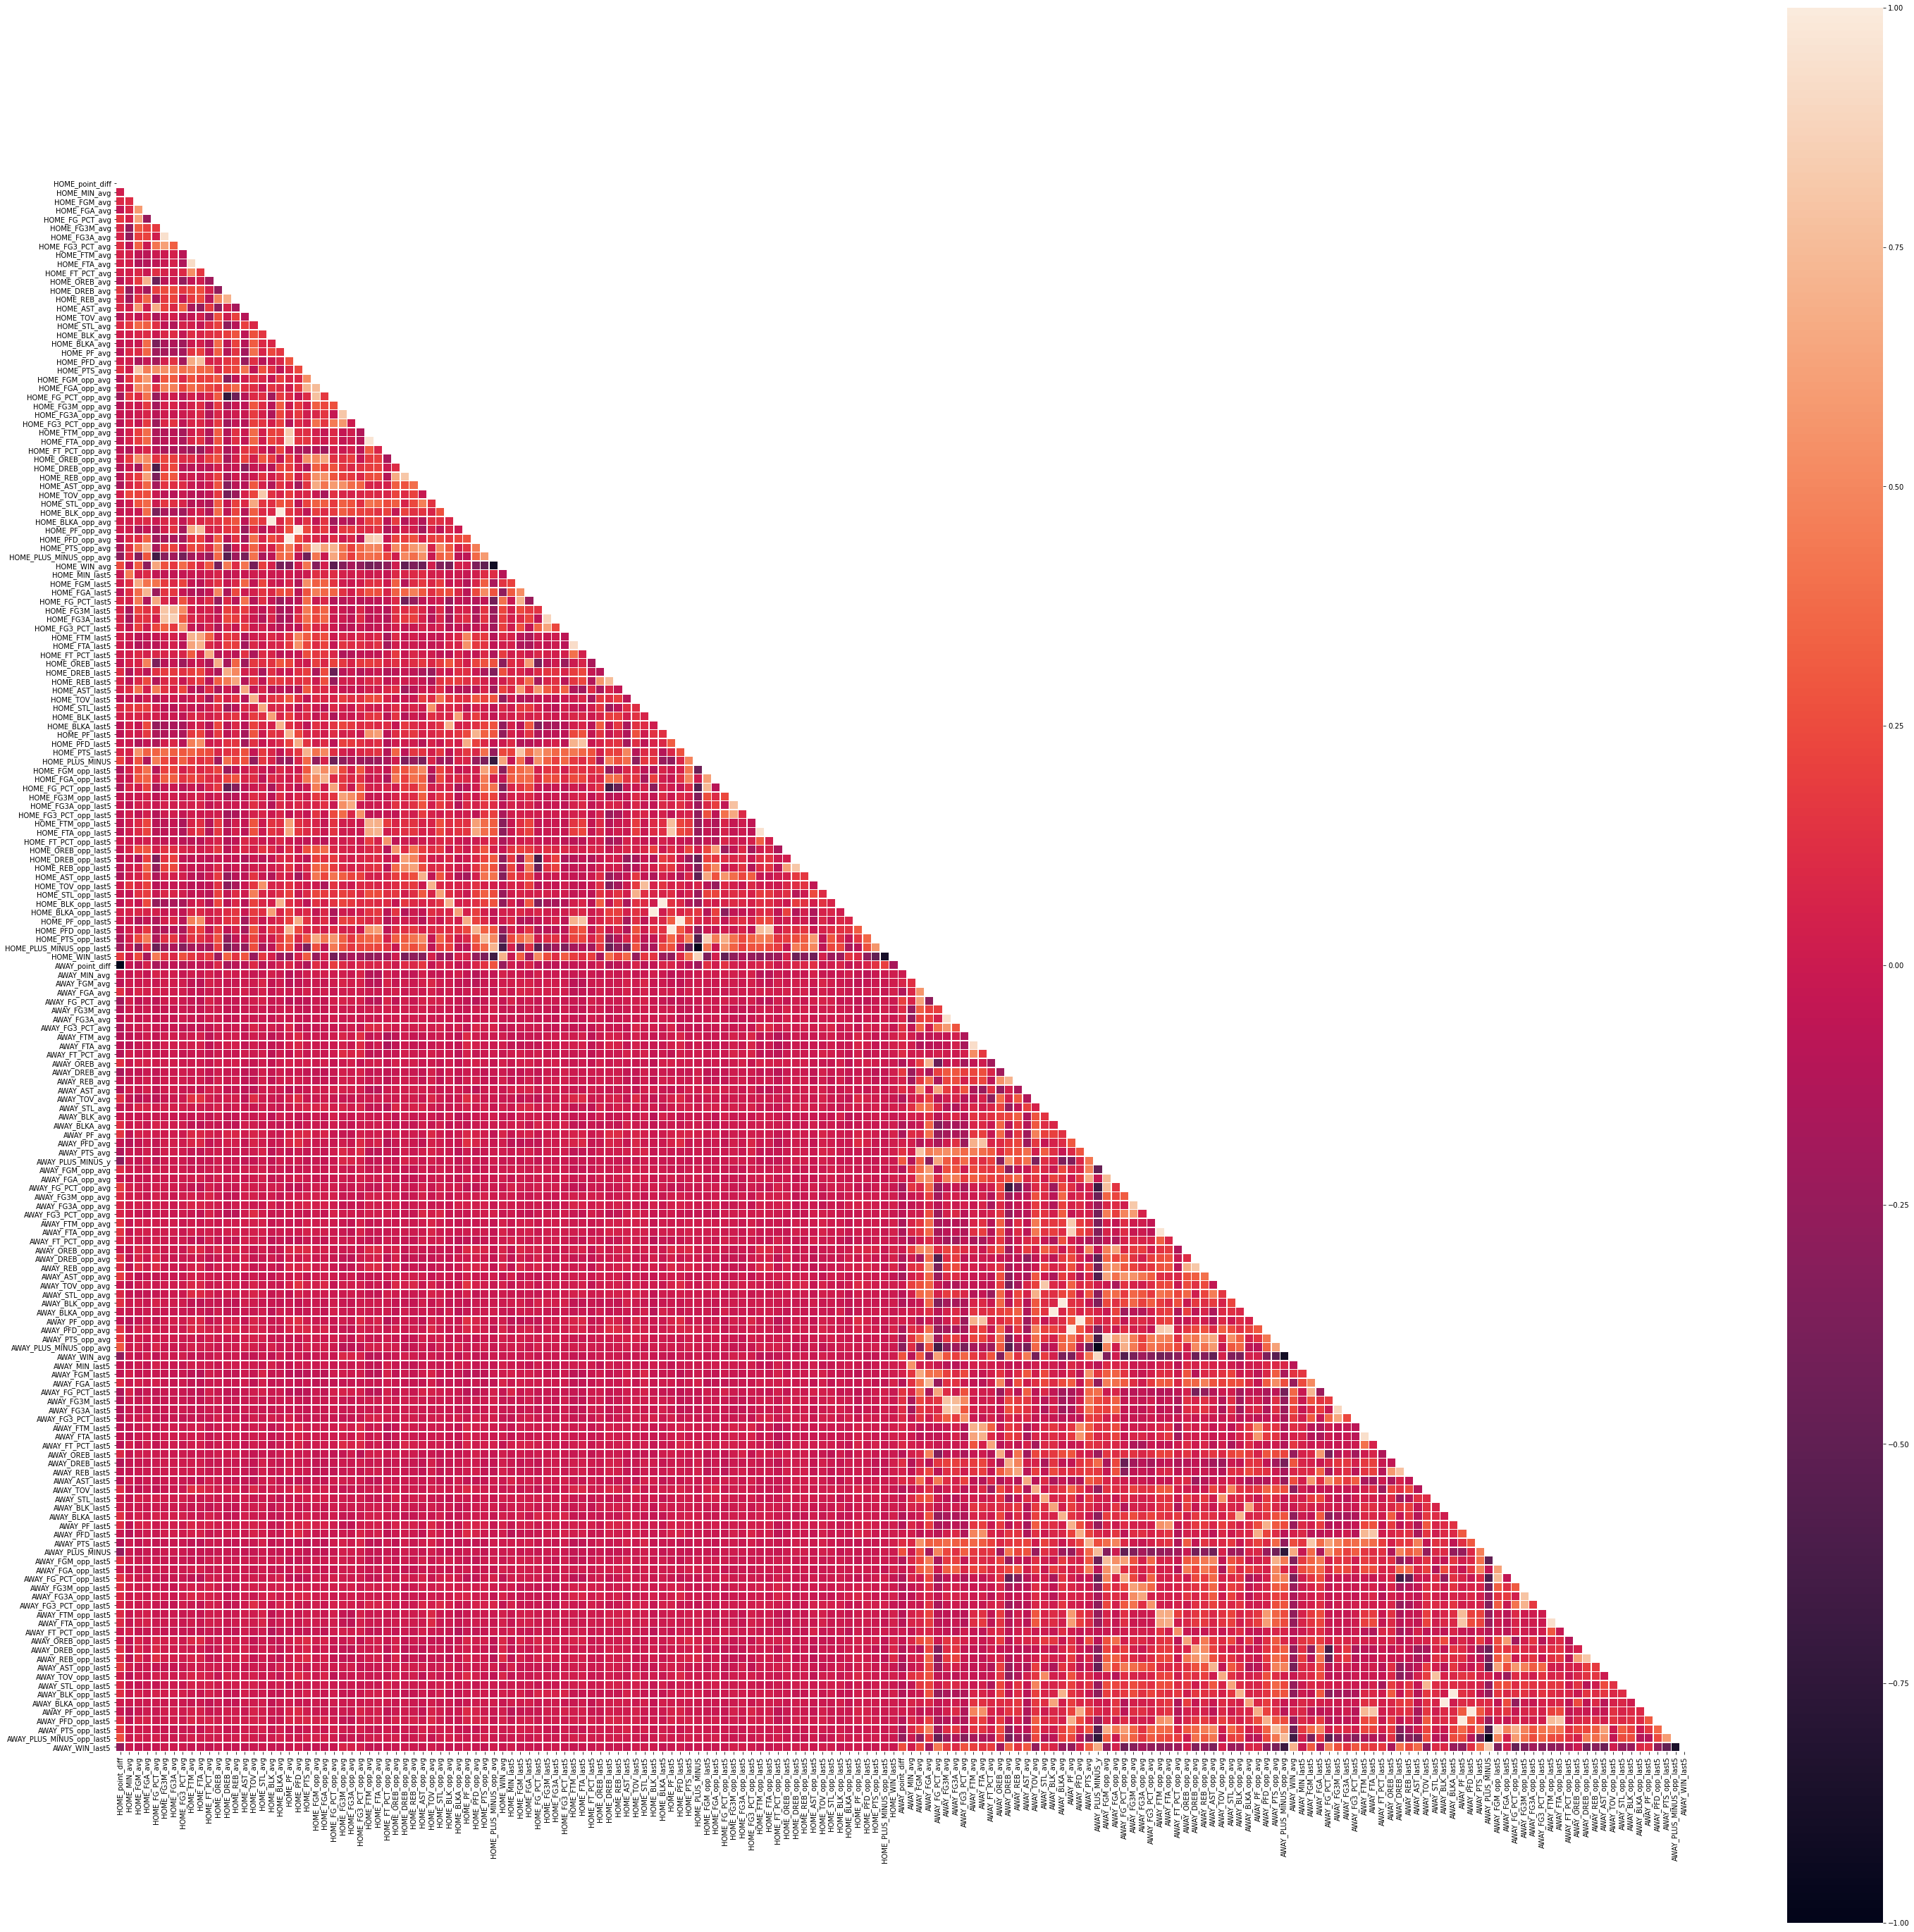

In [418]:
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

corr = final_merged_df.drop(columns=['HOME_TEAM_ABBREVIATION', 'AWAY_TEAM_ABBREVIATION']).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(50,50))

sns.heatmap(corr, mask=mask, square=True, linewidths=0.5)

plt.savefig('correlations.jpg')


In [100]:
def remove_correlated_features(final_merged_df = final_merged_df, threshold=1):
    """Removes correlated features from dataset
    INPUTS:
    final_merged_df
    threshold: float between 0 and 1 indicating how highly correlated features
    must be to be removed
    OUTPUT: final_merged_df with the correlated feature columns removed
    """
    corr = final_merged_df.select_dtypes('number').corr()

    correlated_features = set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) >= threshold:
                colname = corr.columns[i]
                correlated_features.add(colname)
#     print("Correlated Features:", list(correlated_features))
#     print("Num Features Removed ", len(correlated_features))
    final_merged_df.drop(columns=list(correlated_features), inplace=True)
    return final_merged_df

In [104]:
# Remove perfectly correlated features
final_merged_df = remove_correlated_features(final_merged_df_2018)
final_merged_df

,HOME_SEASON_YEAR,HOME_TEAM_ABBREVIATION,HOME_GAME_DATE,HOME_MIN_avg,HOME_FGM_avg,HOME_FGA_avg,HOME_FG_PCT_avg,HOME_FG3M_avg,HOME_FG3A_avg,HOME_FG3_PCT_avg,HOME_FTM_avg,HOME_FTA_avg,HOME_FT_PCT_avg,HOME_OREB_avg,HOME_DREB_avg,HOME_REB_avg,HOME_AST_avg,HOME_TOV_avg,HOME_STL_avg,HOME_BLK_avg,HOME_BLKA_avg,HOME_PF_avg,HOME_PFD_avg,HOME_PTS_avg,HOME_PLUS_MINUS_avg,HOME_SEASON_YEAR_opp,HOME_TEAM_ID_opp,HOME_TEAM_ABBREVIATION_opp,HOME_TEAM_NAME_opp,HOME_GAME_DATE_opp,HOME_MATCHUP_opp,HOME_WL_opp,HOME_MIN_opp,HOME_FGM_opp_avg,HOME_FGA_opp_avg,HOME_FG_PCT_opp_avg,HOME_FG3M_opp_avg,HOME_FG3A_opp_avg,HOME_FG3_PCT_opp_avg,HOME_FTM_opp_avg,HOME_FTA_opp_avg,HOME_FT_PCT_opp_avg,HOME_OREB_opp_avg,HOME_DREB_opp_avg,HOME_REB_opp_avg,HOME_AST_opp_avg,HOME_TOV_opp_avg,HOME_STL_opp_avg,HOME_PTS_opp_avg,HOME_WIN_avg,point_diff,HOME_MIN_last5,HOME_FGM_last5,HOME_FGA_last5,HOME_FG_PCT_last5,HOME_FG3M_last5,HOME_FG3A_last5,HOME_FG3_PCT_last5,HOME_FTM_last5,HOME_FTA_last5,HOME_FT_PCT_last5,HOME_OREB_last5,HOME_DREB_last5,HOME_REB_last5,HOME_AST_last5,HOME_TOV_last5,HOME_STL_last5,HOME_BLK_last5,HOME_BLKA_last5,HOME_PF_last5,HOME_PFD_last5,HOME_PTS_last5,HOME_PLUS_MINUS_last5,HOME_FGM_opp_last5,HOME_FGA_opp_last5,HOME_FG_PCT_opp_last5,HOME_FG3M_opp_last5,HOME_FG3A_opp_last5,HOME_FG3_PCT_opp_last5,HOME_FTM_opp_last5,HOME_FTA_opp_last5,HOME_FT_PCT_opp_last5,HOME_OREB_opp_last5,HOME_DREB_opp_last5,HOME_REB_opp_last5,HOME_AST_opp_last5,HOME_TOV_opp_last5,HOME_STL_opp_last5,HOME_PTS_opp_last5,HOME_WIN_last5,AWAY_TEAM_ABBREVIATION,AWAY_MIN_avg,AWAY_FGM_avg,AWAY_FGA_avg,AWAY_FG_PCT_avg,AWAY_FG3M_avg,AWAY_FG3A_avg,AWAY_FG3_PCT_avg,AWAY_FTM_avg,AWAY_FTA_avg,AWAY_FT_PCT_avg,AWAY_OREB_avg,AWAY_DREB_avg,AWAY_REB_avg,AWAY_AST_avg,AWAY_TOV_avg,AWAY_STL_avg,AWAY_BLK_avg,AWAY_BLKA_avg,AWAY_PF_avg,AWAY_PFD_avg,AWAY_PTS_avg,AWAY_PLUS_MINUS_avg,AWAY_SEASON_YEAR_opp,AWAY_TEAM_ID_opp,AWAY_TEAM_ABBREVIATION_opp,AWAY_TEAM_NAME_opp,AWAY_GAME_DATE_opp,AWAY_MATCHUP_opp,AWAY_WL_opp,AWAY_FGM_opp_avg,AWAY_FGA_opp_avg,AWAY_FG_PCT_opp_avg,AWAY_FG3M_opp_avg,AWAY_FG3A_opp_avg,AWAY_FG3_PCT_opp_avg,AWAY_FTM_opp_avg,AWAY_FTA_opp_avg,AWAY_FT_PCT_opp_avg,AWAY_OREB_opp_avg,AWAY_DREB_opp_avg,AWAY_REB_opp_avg,AWAY_AST_opp_avg,AWAY_TOV_opp_avg,AWAY_STL_opp_avg,AWAY_PTS_opp_avg,AWAY_WIN_avg,AWAY_MIN_last5,AWAY_FGM_last5,AWAY_FGA_last5,AWAY_FG_PCT_last5,AWAY_FG3M_last5,AWAY_FG3A_last5,AWAY_FG3_PCT_last5,AWAY_FTM_last5,AWAY_FTA_last5,AWAY_FT_PCT_last5,AWAY_OREB_last5,AWAY_DREB_last5,AWAY_REB_last5,AWAY_AST_last5,AWAY_TOV_last5,AWAY_STL_last5,AWAY_BLK_last5,AWAY_BLKA_last5,AWAY_PF_last5,AWAY_PFD_last5,AWAY_PTS_last5,AWAY_PLUS_MINUS_last5,AWAY_FGM_opp_last5,AWAY_FGA_opp_last5,AWAY_FG_PCT_opp_last5,AWAY_FG3M_opp_last5,AWAY_FG3A_opp_last5,AWAY_FG3_PCT_opp_last5,AWAY_FTM_opp_last5,AWAY_FTA_opp_last5,AWAY_FT_PCT_opp_last5,AWAY_OREB_opp_last5,AWAY_DREB_opp_last5,AWAY_REB_opp_last5,AWAY_AST_opp_last5,AWAY_TOV_opp_last5,AWAY_STL_opp_last5,AWAY_PTS_opp_last5,AWAY_WIN_last5
2534,2018-19,NYK,2018-10-26,48.000000,39.600000,94.600000,0.417800,11.000000,31.600000,0.347400,16.200000,21.400000,0.762800,10.800000,32.400000,43.200000,20.000000,11.800000,8.200000,2.600000,5.000000,22.200000,22.400000,106.400000,-3.800000,2018-19,1610612744,GSW,Golden State Warriors,2018-10-26,GSW @ NYK,W,48.0,39.000000,85.000000,0.459200,12.200000,32.000000,0.382200,20.000000,25.400000,0.788600,10.600000,40.000000,50.600000,22.600000,17.800000,5.800000,110.200000,0.200000,-28.0,48.0,39.6,94.6,0.4178,11.0,31.6,0.3474,16.2,21.4,0.7628,10.8,32.4,43.2,20.0,11.8,8.2,2.6,5.0,22.2,22.4,106.4,-3.8,39.0,85.0,0.4592,12.2,32.0,0.3822,20.0,25.4,0.7886,10.6,40.0,50.6,22.6,17.8,5.8,110.2,0.2,GSW,48.000000,45.000000,88.200000,0.509600,10.600000,28.800000,0.373800,18.800000,22.200000,0.855200,9.600000,36.200000,45.800000,29.800000,17.600000,7.800000,5.600000,3.200000,25.400000,21.400000,119.400000,9.800000,2018-19,1610612752,NYK,New York Knicks,2018-10-26,NYK vs. GSW,L,37.800000,89.000000,0.424800,11.200000,38.200000,0.284400,22.800000,30.800000,0.

In [101]:
seasons = ['20{}-{}'.format(x, x+1) for x in range(10, 21)]

gamelogs_2010_2020 = []

for season in seasons:
    df = pd.read_csv('./data/gamelog_{}.csv'.format(season))
    df = clean_team_gamelog(df)
    df = get_cumulative_stats(df)
    df = final_preparation(df)
    df = remove_correlated_features(df)
    gamelogs_2010_2020.append(df)
    
gamelogs_all_seasons = pd.concat(gamelogs_2010_2020)
    

C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [102]:
gamelogs_all_seasons.to_csv('./data/gamelogs_all_seasons.csv', index=False)

In [103]:
gamelogs_all_seasons = pd.read_csv('./data/gamelogs_all_seasons.csv')
gamelogs_all_seasons

,HOME_SEASON_YEAR,HOME_TEAM_ABBREVIATION,HOME_GAME_DATE,HOME_MIN_avg,HOME_FGM_avg,HOME_FGA_avg,HOME_FG_PCT_avg,HOME_FG3M_avg,HOME_FG3A_avg,HOME_FG3_PCT_avg,HOME_FTM_avg,HOME_FTA_avg,HOME_FT_PCT_avg,HOME_OREB_avg,HOME_DREB_avg,HOME_REB_avg,HOME_AST_avg,HOME_TOV_avg,HOME_STL_avg,HOME_BLK_avg,HOME_BLKA_avg,HOME_PF_avg,HOME_PFD_avg,HOME_PTS_avg,HOME_PLUS_MINUS_avg,HOME_SEASON_YEAR_opp,HOME_TEAM_ID_opp,HOME_TEAM_ABBREVIATION_opp,HOME_TEAM_NAME_opp,HOME_GAME_DATE_opp,HOME_MATCHUP_opp,HOME_WL_opp,HOME_MIN_opp,HOME_FGM_opp_avg,HOME_FGA_opp_avg,HOME_FG_PCT_opp_avg,HOME_FG3M_opp_avg,HOME_FG3A_opp_avg,HOME_FG3_PCT_opp_avg,HOME_FTM_opp_avg,HOME_FTA_opp_avg,HOME_FT_PCT_opp_avg,HOME_OREB_opp_avg,HOME_DREB_opp_avg,HOME_REB_opp_avg,HOME_AST_opp_avg,HOME_TOV_opp_avg,HOME_STL_opp_avg,HOME_PTS_opp_avg,HOME_WIN_avg,point_diff,HOME_MIN_last5,HOME_FGM_last5,HOME_FGA_last5,HOME_FG_PCT_last5,HOME_FG3M_last5,HOME_FG3A_last5,HOME_FG3_PCT_last5,HOME_FTM_last5,HOME_FTA_last5,HOME_FT_PCT_last5,HOME_OREB_last5,HOME_DREB_last5,HOME_REB_last5,HOME_AST_last5,HOME_TOV_last5,HOME_STL_last5,HOME_BLK_last5,HOME_BLKA_last5,HOME_PF_last5,HOME_PFD_last5,HOME_PTS_last5,HOME_PLUS_MINUS_last5,HOME_FGM_opp_last5,HOME_FGA_opp_last5,HOME_FG_PCT_opp_last5,HOME_FG3M_opp_last5,HOME_FG3A_opp_last5,HOME_FG3_PCT_opp_last5,HOME_FTM_opp_last5,HOME_FTA_opp_last5,HOME_FT_PCT_opp_last5,HOME_OREB_opp_last5,HOME_DREB_opp_last5,HOME_REB_opp_last5,HOME_AST_opp_last5,HOME_TOV_opp_last5,HOME_STL_opp_last5,HOME_PTS_opp_last5,HOME_WIN_last5,AWAY_TEAM_ABBREVIATION,AWAY_MIN_avg,AWAY_FGM_avg,AWAY_FGA_avg,AWAY_FG_PCT_avg,AWAY_FG3M_avg,AWAY_FG3A_avg,AWAY_FG3_PCT_avg,AWAY_FTM_avg,AWAY_FTA_avg,AWAY_FT_PCT_avg,AWAY_OREB_avg,AWAY_DREB_avg,AWAY_REB_avg,AWAY_AST_avg,AWAY_TOV_avg,AWAY_STL_avg,AWAY_BLK_avg,AWAY_BLKA_avg,AWAY_PF_avg,AWAY_PFD_avg,AWAY_PTS_avg,AWAY_PLUS_MINUS_avg,AWAY_SEASON_YEAR_opp,AWAY_TEAM_ID_opp,AWAY_TEAM_ABBREVIATION_opp,AWAY_TEAM_NAME_opp,AWAY_GAME_DATE_opp,AWAY_MATCHUP_opp,AWAY_WL_opp,AWAY_FGM_opp_avg,AWAY_FGA_opp_avg,AWAY_FG_PCT_opp_avg,AWAY_FG3M_opp_avg,AWAY_FG3A_opp_avg,AWAY_FG3_PCT_opp_avg,AWAY_FTM_opp_avg,AWAY_FTA_opp_avg,AWAY_FT_PCT_opp_avg,AWAY_OREB_opp_avg,AWAY_DREB_opp_avg,AWAY_REB_opp_avg,AWAY_AST_opp_avg,AWAY_TOV_opp_avg,AWAY_STL_opp_avg,AWAY_PTS_opp_avg,AWAY_WIN_avg,AWAY_MIN_last5,AWAY_FGM_last5,AWAY_FGA_last5,AWAY_FG_PCT_last5,AWAY_FG3M_last5,AWAY_FG3A_last5,AWAY_FG3_PCT_last5,AWAY_FTM_last5,AWAY_FTA_last5,AWAY_FT_PCT_last5,AWAY_OREB_last5,AWAY_DREB_last5,AWAY_REB_last5,AWAY_AST_last5,AWAY_TOV_last5,AWAY_STL_last5,AWAY_BLK_last5,AWAY_BLKA_last5,AWAY_PF_last5,AWAY_PFD_last5,AWAY_PTS_last5,AWAY_PLUS_MINUS_last5,AWAY_FGM_opp_last5,AWAY_FGA_opp_last5,AWAY_FG_PCT_opp_last5,AWAY_FG3M_opp_last5,AWAY_FG3A_opp_last5,AWAY_FG3_PCT_opp_last5,AWAY_FTM_opp_last5,AWAY_FTA_opp_last5,AWAY_FT_PCT_opp_last5,AWAY_OREB_opp_last5,AWAY_DREB_opp_last5,AWAY_REB_opp_last5,AWAY_AST_opp_last5,AWAY_TOV_opp_last5,AWAY_STL_opp_last5,AWAY_PTS_opp_last5,AWAY_WIN_last5,HOME_PF_opp_avg,HOME_PFD_opp_avg,HOME_PF_opp_last5,HOME_PFD_opp_last5,AWAY_PFD_opp_avg,AWAY_PFD_opp_last5
0,2010-11,MIN,2010-11-05,48.000000,33.000000,86.600000,0.379800,6.400000,18.800000,0.345000,24.400000,32.400000,0.756800,15.200000,33.800000,49.000000,15.000000,19.800000,7.600000,5.600000,7.000000,26.400000,26.200000,96.800000,-16.800000,2010-11,1610612737,ATL,Atlanta Hawks,2010-11-05,ATL @ MIN,W,48.0,41.000000,87.200000,0.471800,8.400000,20.600000,0.393800,23.200000,30.600000,0.768000,11.400000,34.600000,46.000000,25.600000,14.800000,10.400000,113.600000,0.200000,-10.0,48.0,33.0,86.6,0.3798,6.4,18.8,0.3450,24.4,32.4,0.7568,15.2,33.8,49.0,15.0,19.8,7.6,5.6,7.0,26.4,26.2,96.8,-16.8,41.0,87.2,0.4718,8.4,20.6,0.3938,23.2,30.6,0.7680,11.4,34.6,46.0,25.6,14.8,10.4,113.6,0.2,ATL,48.000000,37.000000,76.400000,0.487200,5.400000,16.600000,0.324800,23.800000,29.000000,0.820600,9.800000,32.400000,42.200000,22.800000,14.600000,4.800000,6.200000,5.800000,19.600000,23.000000,103.200000,8.600000,2010-11,1610612750,MIN,Minnesota Timberwolves,2010-1

10056

In [134]:
gamelogs_all_seasons = gamelogs_all_seasons.dropna(axis=1)

X_train = gamelogs_all_seasons.loc[gamelogs_all_seasons['HOME_GAME_DATE'] <= '2018-04-10']
X_train.drop(columns = ['HOME_SEASON_YEAR', 'HOME_TEAM_ABBREVIATION', 'HOME_GAME_DATE',
                       'AWAY_TEAM_ABBREVIATION', 'AWAY_SEASON_YEAR_opp', 'AWAY_TEAM_ID_opp',
                       'AWAY_TEAM_ABBREVIATION_opp', 'AWAY_GAME_DATE_opp', 'AWAY_MATCHUP_opp',
                       'AWAY_WL_opp', 'HOME_SEASON_YEAR_opp', 'HOME_TEAM_ID_opp', 
                        'HOME_TEAM_ABBREVIATION_opp', 'HOME_TEAM_NAME_opp', 'HOME_GAME_DATE_opp', 
                        'HOME_MATCHUP_opp', 'HOME_WL_opp', 'AWAY_TEAM_NAME_opp'],inplace=True)


y_train = gamelogs_all_seasons.loc[gamelogs_all_seasons['HOME_GAME_DATE'] <= '2018-04-10', 'point_diff']


X_test = gamelogs_all_seasons.loc[gamelogs_all_seasons['HOME_GAME_DATE'] > '2018-04-10']
X_test.drop(columns = ['HOME_SEASON_YEAR', 'HOME_TEAM_ABBREVIATION', 'HOME_GAME_DATE',
                       'AWAY_TEAM_ABBREVIATION', 'AWAY_SEASON_YEAR_opp', 'AWAY_TEAM_ID_opp',
                       'AWAY_TEAM_ABBREVIATION_opp', 'AWAY_GAME_DATE_opp', 'AWAY_MATCHUP_opp',
                       'AWAY_WL_opp', 'HOME_SEASON_YEAR_opp', 'HOME_TEAM_ID_opp', 
                        'HOME_TEAM_ABBREVIATION_opp', 'HOME_TEAM_NAME_opp', 'HOME_GAME_DATE_opp', 
                        'HOME_MATCHUP_opp', 'HOME_WL_opp', 'AWAY_TEAM_NAME_opp'],inplace=True)


y_test = gamelogs_all_seasons.loc[gamelogs_all_seasons['HOME_GAME_DATE'] > '2018-04-10', 'point_diff'] 



    
    

C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [135]:
print(X_train.shape, y_train.shape)

(8952, 158) (8952,)


In [136]:
X_train

,HOME_MIN_avg,HOME_FGM_avg,HOME_FGA_avg,HOME_FG_PCT_avg,HOME_FG3M_avg,HOME_FG3A_avg,HOME_FG3_PCT_avg,HOME_FTM_avg,HOME_FTA_avg,HOME_FT_PCT_avg,HOME_OREB_avg,HOME_DREB_avg,HOME_REB_avg,HOME_AST_avg,HOME_TOV_avg,HOME_STL_avg,HOME_BLK_avg,HOME_BLKA_avg,HOME_PF_avg,HOME_PFD_avg,HOME_PTS_avg,HOME_PLUS_MINUS_avg,HOME_MIN_opp,HOME_FGM_opp_avg,HOME_FGA_opp_avg,HOME_FG_PCT_opp_avg,HOME_FG3M_opp_avg,HOME_FG3A_opp_avg,HOME_FG3_PCT_opp_avg,HOME_FTM_opp_avg,HOME_FTA_opp_avg,HOME_FT_PCT_opp_avg,HOME_OREB_opp_avg,HOME_DREB_opp_avg,HOME_REB_opp_avg,HOME_AST_opp_avg,HOME_TOV_opp_avg,HOME_STL_opp_avg,HOME_PTS_opp_avg,HOME_WIN_avg,point_diff,HOME_MIN_last5,HOME_FGM_last5,HOME_FGA_last5,HOME_FG_PCT_last5,HOME_FG3M_last5,HOME_FG3A_last5,HOME_FG3_PCT_last5,HOME_FTM_last5,HOME_FTA_last5,HOME_FT_PCT_last5,HOME_OREB_last5,HOME_DREB_last5,HOME_REB_last5,HOME_AST_last5,HOME_TOV_last5,HOME_STL_last5,HOME_BLK_last5,HOME_BLKA_last5,HOME_PF_last5,HOME_PFD_last5,HOME_PTS_last5,HOME_PLUS_MINUS_last5,HOME_FGM_opp_last5,HOME_FGA_opp_last5,HOME_FG_PCT_opp_last5,HOME_FG3M_opp_last5,HOME_FG3A_opp_last5,HOME_FG3_PCT_opp_last5,HOME_FTM_opp_last5,HOME_FTA_opp_last5,HOME_FT_PCT_opp_last5,HOME_OREB_opp_last5,HOME_DREB_opp_last5,HOME_REB_opp_last5,HOME_AST_opp_last5,HOME_TOV_opp_last5,HOME_STL_opp_last5,HOME_PTS_opp_last5,HOME_WIN_last5,AWAY_MIN_avg,AWAY_FGM_avg,AWAY_FGA_avg,AWAY_FG_PCT_avg,AWAY_FG3M_avg,AWAY_FG3A_avg,AWAY_FG3_PCT_avg,AWAY_FTM_avg,AWAY_FTA_avg,AWAY_FT_PCT_avg,AWAY_OREB_avg,AWAY_DREB_avg,AWAY_REB_avg,AWAY_AST_avg,AWAY_TOV_avg,AWAY_STL_avg,AWAY_BLK_avg,AWAY_BLKA_avg,AWAY_PF_avg,AWAY_PFD_avg,AWAY_PTS_avg,AWAY_PLUS_MINUS_avg,AWAY_FGM_opp_avg,AWAY_FGA_opp_avg,AWAY_FG_PCT_opp_avg,AWAY_FG3M_opp_avg,AWAY_FG3A_opp_avg,AWAY_FG3_PCT_opp_avg,AWAY_FTM_opp_avg,AWAY_FTA_opp_avg,AWAY_FT_PCT_opp_avg,AWAY_OREB_opp_avg,AWAY_DREB_opp_avg,AWAY_REB_opp_avg,AWAY_AST_opp_avg,AWAY_TOV_opp_avg,AWAY_STL_opp_avg,AWAY_PTS_opp_avg,AWAY_WIN_avg,AWAY_MIN_last5,AWAY_FGM_last5,AWAY_FGA_last5,AWAY_FG_PCT_last5,AWAY_FG3M_last5,AWAY_FG3A_last5,AWAY_FG3_PCT_last5,AWAY_FTM_last5,AWAY_FTA_last5,AWAY_FT_PCT_last5,AWAY_OREB_last5,AWAY_DREB_last5,AWAY_REB_last5,AWAY_AST_last5,AWAY_TOV_last5,AWAY_STL_last5,AWAY_BLK_last5,AWAY_BLKA_last5,AWAY_PF_last5,AWAY_PFD_last5,AWAY_PTS_last5,AWAY_PLUS_MINUS_last5,AWAY_FGM_opp_last5,AWAY_FGA_opp_last5,AWAY_FG_PCT_opp_last5,AWAY_FG3M_opp_last5,AWAY_FG3A_opp_last5,AWAY_FG3_PCT_opp_last5,AWAY_FTM_opp_last5,AWAY_FTA_opp_last5,AWAY_FT_PCT_opp_last5,AWAY_OREB_opp_last5,AWAY_DREB_opp_last5,AWAY_REB_opp_last5,AWAY_AST_opp_last5,AWAY_TOV_opp_last5,AWAY_STL_opp_last5,AWAY_PTS_opp_last5,AWAY_WIN_last5
0,48.000000,33.000000,86.600000,0.379800,6.400000,18.800000,0.345000,24.400000,32.400000,0.756800,15.200000,33.800000,49.000000,15.000000,19.800000,7.600000,5.600000,7.000000,26.400000,26.200000,96.800000,-16.800000,48.0,41.000000,87.200000,0.471800,8.400000,20.600000,0.393800,23.200000,30.600000,0.768000,11.400000,34.600000,46.000000,25.600000,14.800000,10.400000,113.600000,0.200000,-10.0,48.0,33.0,86.6,0.3798,6.4,18.8,0.3450,24.4,32.4,0.7568,15.2,33.8,49.0,15.0,19.8,7.6,5.6,7.0,26.4,26.2,96.8,-16.8,41.0,87.2,0.4718,8.4,20.6,0.3938,23.2,30.6,0.7680,11.4,34.6,46.0,25.6,14.8,10.4,113.6,0.2,48.000000,37.000000,76.400000,0.487200,5.400000,16.600000,0.324800,23.800000,29.000000,0.820600,9.800000,32.400000,42.200000,22.800000,14.600000,4.800000,6.200000,5.800000,19.600000,23.000000,103.200000,8.600000,36.200000,82.200000,0.441800,4.200000,13.200000,0.340400,18.000000,24.000000,0.740000,11.200000,27.000000,38.200000,17.800000,12.600000,6.600000,94.600000,1.000000,48.0,37.0,76.4,0.4872,5.4,16.6,0.3248,23.8,29.0,0.8206,9.8,32.4,42.2,22.8,14.6,4.8,6.2,5.8,19.6,23.0,103.2,8.6,36.2,82.2,0.4418,4.2,13.2,0.3404,18.0,24.0,0.7400,11.2,27.0,38.2,17.8,12.6,6.6,94.6,1.0
1,48.000000,34.666667,74.666667,0.465333,7.833333,18.666667,0.420333,22.166667,28.666667,0.778167,8.500000,33.166667,41.666667,21.000000,13.666667,8.166667,5.833333,2.333333,21.833333,20.833333,99.333333,13.333333,48.0,31.50

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR

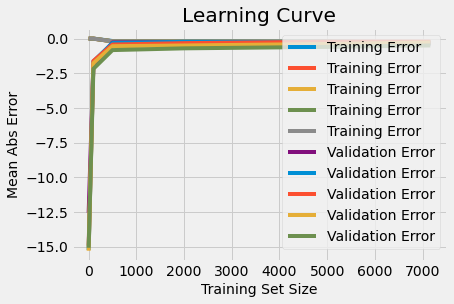

In [138]:
model = LinearRegression()
pipeline = Pipeline([('normalize', Normalizer()),
                    ('est', model)
                    ]
                   )


train_sizes = [1, 100, 500, 2000, 5000, 7161]

train_sizes, train_scores, validation_scores = learning_curve(estimator = pipeline,
                                                             X = X_train,
                                                             y = y_train,
                                                             train_sizes = train_sizes,
                                                             scoring='neg_mean_absolute_error')

plt.style.use('fivethirtyeight')

plt.plot(train_sizes, train_scores, label='Training Error')
plt.plot(train_sizes, validation_scores, label='Validation Error')
plt.ylabel('Mean Abs Error', fontsize=14)
plt.xlabel('Training Set Size', fontsize=14)
plt.title('Learning Curve')
plt.legend()
plt.show()

In [139]:
pipeline.fit(X_train, y_train)

y_preds = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.8617618727266909


In [96]:
df = pd.DataFrame({'B': [4, 3, 2, 1, 2, np.nan, 4]})
df.rolling(2, min_periods=1).mean()

,B
0,4.0
1,3.5
2,2.5
3,1.5
4,1.5
5,2.0
6,4.0
